In [1]:
.libPaths('/root/miniconda3/envs/Rdoc/lib/R/library')

In [4]:
library(scran)

In [5]:
library(Rphenograph)
library(igraph)
library(dittoSeq)

In [6]:
library(SpatialExperiment)

In [7]:
T = readRDS('./mye.anno.rds')

In [36]:
rownames(spe)

[1] "IL-6"      "CD14"      "FoxP3"     "CD69"      "CD4"       "CD8a"     
 [7] "CollagenI" "BCA1"      "CD31"      "TIM3"      "PDPN"      "CD103"    
[13] "CD276"     "CD71"      "CXCR4"     "PD-L1"     "CCR7"      "CD68"     
[19] "CD11b"     "CD20"      "FosB"      "FAP"       "GranzymeB" "PD-1"     
[25] "Ki-67"     "GATA-3"    "HLA-DR"    "CD45RA"    "CD3"       "TNFa"     
[31] "m6A"       "CD45RO"    "CD57"      "OLR1"      "KLF2"      "NLRP3"    
[37] "HIF1a"     "Vimentin"

In [8]:
spe = T

In [9]:
options(repr.plot.width = 6,repr.plot.height = 6)

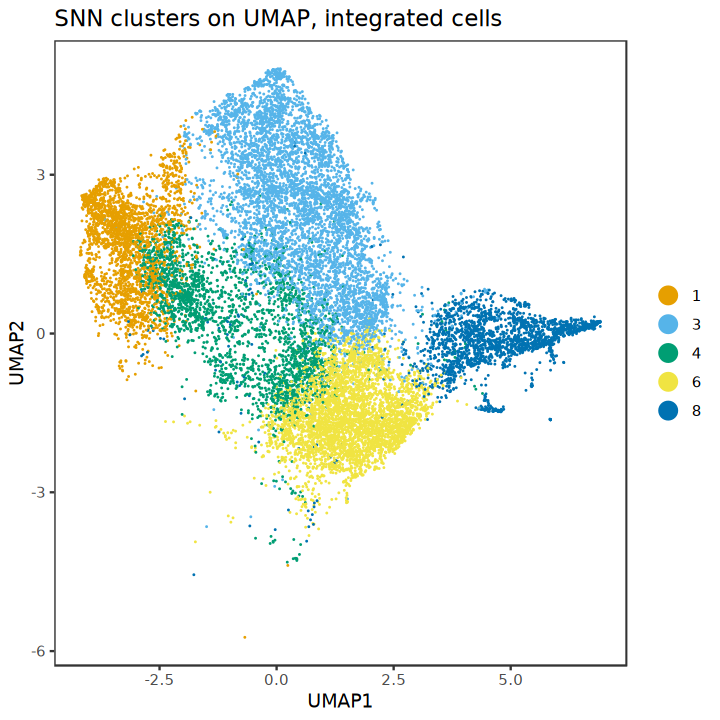

In [10]:
dittoDimPlot(spe, var = "nn_clusters_corrected", 
             reduction.use = "UMAP_mnnCorrected", size = 0.2,
             do.label = FALSE) +
    ggtitle("SNN clusters on UMAP, integrated cells")

In [11]:
ggsave('mye.figure1.umap.pdf',height = 6,width = 6)

Loading required package: viridisLite



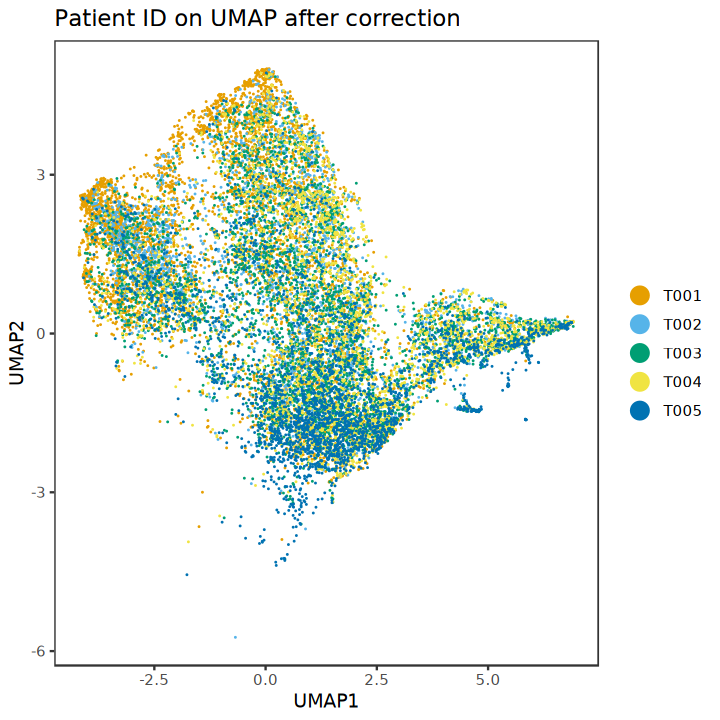

In [12]:
library(cowplot)
library(dittoSeq)
library(viridis)
dittoDimPlot(spe, var = "patient_id", 
                   reduction.use = "UMAP_mnnCorrected", size = 0.2) + 
   #scale_color_manual(values = metadata(spe)$color_vectors$patient_id) +
    ggtitle("Patient ID on UMAP after correction")

In [13]:
ggsave('mye.figure1.umap2.pdf',height = 6,width = 6)

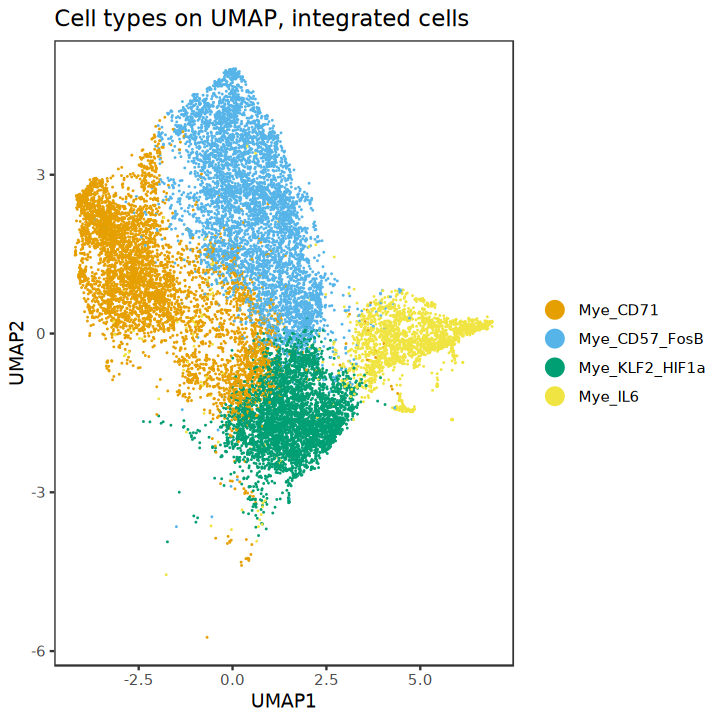

In [14]:
dittoDimPlot(spe, 
                   var = "celltype", 
                   reduction.use = "UMAP_mnnCorrected", 
                   size = 0.2,
                   do.label = FALSE) +
 # scale_color_manual(values = metadata(spe)$color_vectors$celltype) +
  theme(legend.title = element_blank()) +
  ggtitle("Cell types on UMAP, integrated cells")

In [15]:
ggsave('mye.figure1.umap3.pdf',height = 6,width = 6)

In [18]:
funcge = c('IL-6','FoxP3','CXCR4','FosB','Ki-67','TNFa','CD71',
           'NLRP3','HIF1a')

In [ ]:
library(ggsci)

In [16]:
unique(spe$celltype)

[1] Mye_CD71       Mye_CD57_FosB  Mye_KLF2_HIF1a Mye_IL6       
Levels: Mye_CD71 unlabel Mye_CD57_FosB Mye_KLF2_HIF1a Mye_IL6

In [21]:
spe$celltype = factor(spe$celltype,levels = c('Mye_CD71','Mye_CD57_FosB','Mye_KLF2_HIF1a','Mye_IL6'

))

In [22]:
T = spe

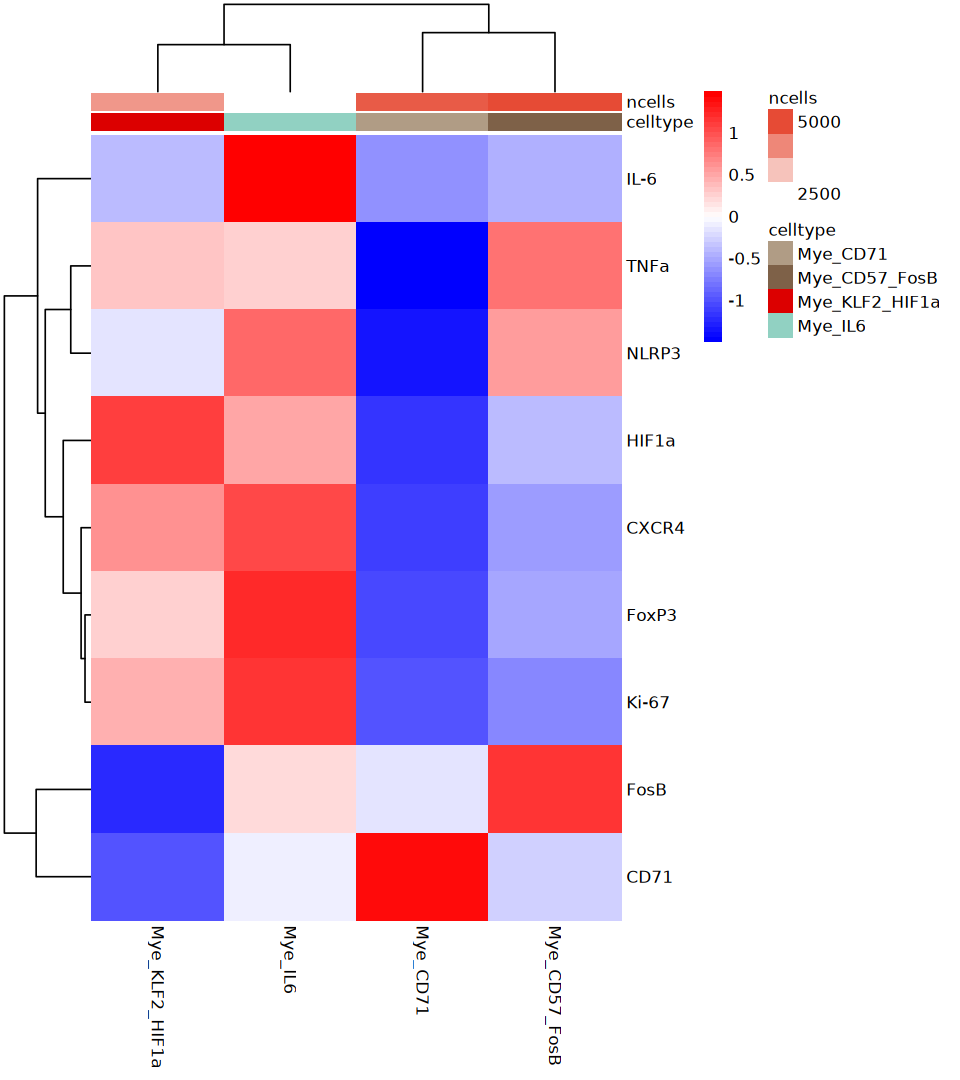

In [23]:
library(scuttle)
## aggregate by cell type
celltype_mean <- aggregateAcrossCells(as(T, "SingleCellExperiment"),  
                     ids = T$celltype, 
                     statistics = "mean",
                     use.assay.type = "exprs", 
                     subset.row = funcge)

library(dittoSeq)
library(colorspace)
library(viridis)

options(repr.plot.width = 8,repr.plot.height = 9)

p = dittoHeatmap(celltype_mean,
             assay = "exprs", 
             cluster_cols = TRUE, show_rownames = TRUE,show_colnames =TRUE,
             annot.colors = rev(pal_npg("nrc")(10)),
             annot.by = c("celltype", "ncells"))

In [24]:
pdf('Mye.figure2.heat.pdf',width = 6,height = 6)
p
dev.off()

png 
  2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


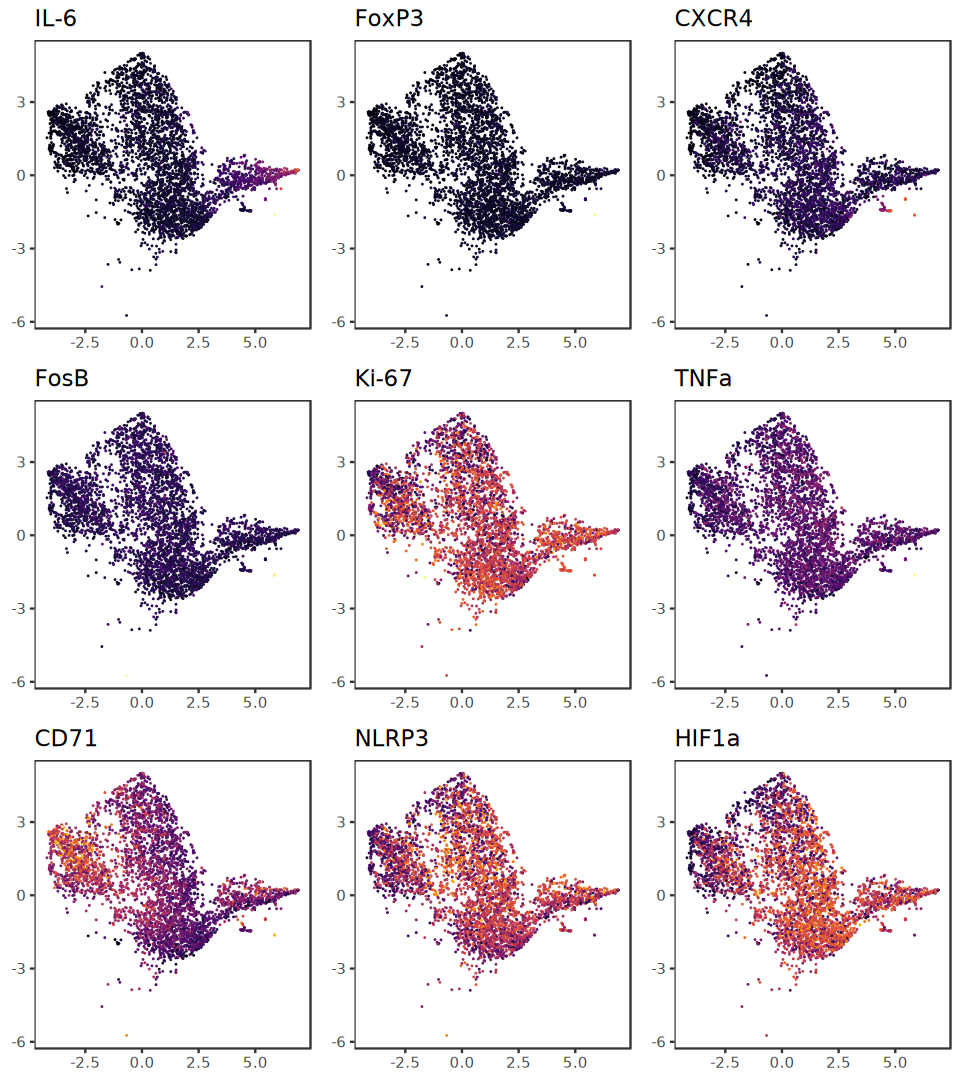

In [25]:
set.seed(220818)
cur_cells <- sample(seq_len(ncol(spe)), 4000)
plot_list <- multi_dittoDimPlot(spe[,cur_cells], var = funcge, reduction.use = "UMAP_mnnCorrected", 
                   assay = "exprs", size = 0.2, list.out = TRUE) 
plot_list <- lapply(plot_list, function(x) x + scale_color_viridis(option = "B")  )
plot_grid(plotlist = plot_list) 

In [26]:
ggsave('Mye.figure1.marker.pdf',height = 12,width = 12)

In [27]:
options(repr.plot.height = 6,repr.plot.width = 6)

In [28]:
p = dittoBarPlot(spe, 
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(10))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


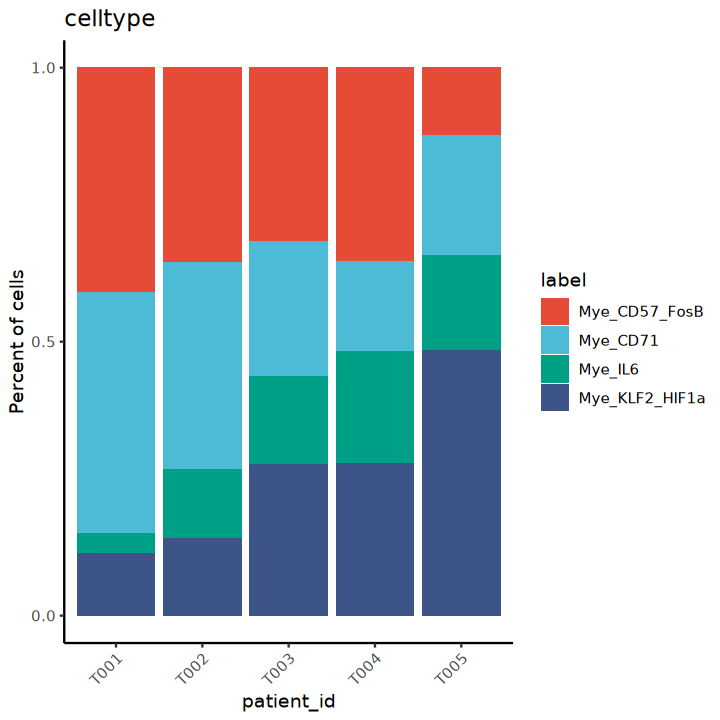

In [29]:
p

In [30]:
pdf('Mye.figure2.barplot.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

In [31]:
p = dittoBarPlot(spe, 
             scale = "count",
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(10))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


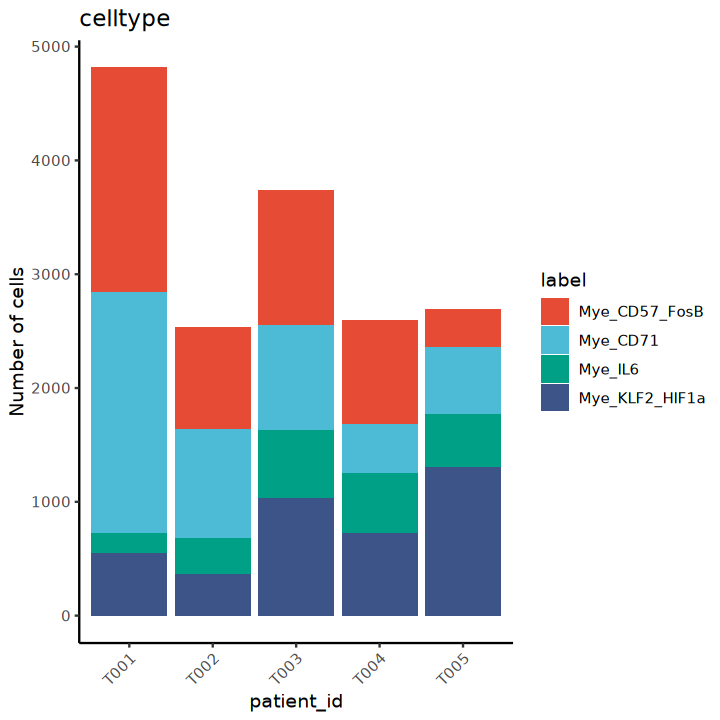

In [32]:
p

In [33]:
pdf('Mye.figure2.barplot2.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

In [35]:
saveRDS(spe,file = './data2/mye.anno.rds')